### Week 3 Linear Regression

In [16]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will explain linear regression models with Advertising dataset.

1. We import the necessary packages.

In [17]:
import pandas as pd
import statsmodels.api as sm
# api submodule gives access to the most commonly used 
# classes and functions directly.

2. We read in the datasets.

In [18]:
ads = pd.read_csv('Datasets/Advertising.csv')
# If we use absolute path (you may use copy path in Windows)
# ads = pd.read_csv("C:\\Users\\gelin\\OneDrive - UNT System\\DSCI 5240\\S24\\Advertising.csv")

In [19]:
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
# Delete a column
ads.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [21]:
del ads['Unnamed: 0']

In [22]:
ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


3. Run the linear regression model

In [24]:
# Prepare the variables: dependent, independent and the constant
y = ads['sales']

X = ads[['TV', 'radio', 'newspaper']]
# X = ads['TV']

X_with_intercept = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_intercept)
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.58e-96
Time:                        15:18:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. Make predictions

In [26]:
# Use predict() to make predictions
sales_predicted = results.predict(X_with_intercept)

In [27]:
# Join it with the original dataset
ads['sales_predicted'] = sales_predicted

In [28]:
ads.head()
# There is a difference between actual sales and predicted sales

,TV,radio,newspaper,sales,sales_predicted
0,230.1,37.8,69.2,22.1,20.523974
1,44.5,39.3,45.1,10.4,12.337855
2,17.2,45.9,69.3,9.3,12.307671
3,151.5,41.3,58.5,18.5,17.597830
4,180.8,10.8,58.4,12.9,13.188672


In [29]:
ads['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [ ]:
# You may use sklearn to calculate mse, rmse
from sklearn.metrics import root_mean_squared_error
# RMSE
root_mean_squared_error(ads['sales'], ads['sales_predicted'])
# mean_squared_error Without (squared = False), we get MSE
# root_mean_squared_error fixes this^

1.66857014072257

In [31]:
# To get the number of observations, slice the first item of 
# the shape attribute
ads.shape[0]

200

In [32]:
mse = sum((ads['sales_predicted'] - ads['sales'])**2)/ads.shape[0]

In [33]:
mse

2.7841263145109365

In [34]:
import math
rmse = math.sqrt(mse)

5. Introduce interaction terms

In [35]:
# To account for synergies between variables
# create a new variable of the interaction term

ads['TVXRadio'] = ads['TV']*ads['radio']

In [36]:
ads.head()

,TV,radio,newspaper,sales,sales_predicted,TVXRadio
0,230.1,37.8,69.2,22.1,20.523974,8697.78
1,44.5,39.3,45.1,10.4,12.337855,1748.85
2,17.2,45.9,69.3,9.3,12.307671,789.48
3,151.5,41.3,58.5,18.5,17.597830,6256.95
4,180.8,10.8,58.4,12.9,13.188672,1952.64


In [37]:
# Prepare the variables: dependent, independent and the constant
y = ads['sales']

X_interact = ads[['TV', 'radio', 'TVXRadio']]

X_interact_with_intercept = sm.add_constant(X_interact)

# Fit the linear regression model
model_interact = sm.OLS(y, X_interact_with_intercept)
results_interact = model_interact.fit()

In [38]:
results_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          6.68e-146
Time:                        15:18:12   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TVXRadio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Practice with Happiness data

In [39]:
happy = pd.read_csv('Datasets/Happiness2019.csv')

In [40]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [41]:
# Which countries are happy?
# We define that if their happiness scores are above average,
# they are happy.

In [42]:
happy['Score'].mean()

5.407096153846155

In [43]:
happyCountries = happy[happy['Score'] > happy['Score'].mean()]
happyCountries.head(50)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [44]:
# Which country is the least happy
happy[happy['Score'] == happy['Score'].min()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
155,156,South Sudan,2.853,0.306,0.575,0.295,0.01,0.202,0.091


In [45]:
# How the social and economic factors affect the happiness?
# prediction vs. inference
# A predictive question

In [46]:
happy.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [47]:
# Use a linear regression model
y_happy = happy['Score']
happy['GDP*Social'] = happy['GDP per capita'] * happy['Social support']
features = ['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'GDP*Social']
X_happy = happy[features]
# Add constant
X_happy_c = sm.add_constant(X_happy)
# Fit the linear regression model
model_happy = sm.OLS(y_happy, X_happy_c)
results_happy = model_happy.fit()
results_happy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     87.06
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.96e-49
Time:                        15:18:12   Log-Likelihood:                -110.22
No. Observations:                 156   AIC:                             236.4
Df Residuals:                     148   BIC:                             260.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.0507      0.349      8.753      0.000       2.362       3.739
GDP per capita                  -1.2913      0.514     -2.513      0.013      -2.307      -0.276
Social support                   0.0422      0.333      0.127      0.899      -0.615       0.700
Healthy life expectancy          1.0950      0.316      3.468      0.001       0.471       1.719
Freedom to make life choices     1.5366      0.355      4.332      0.000       0.836       2.238
Generosity                       0.2597      0.473      0.549      0.584      -0.674       1.194
Perceptions of corruption        0.1798      0.543      0.331      0.741      -0.893       1.252
GDP*Social                       1.6973      0.387      4.390      0.000       0.933       2.461
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.913
Skew:                          -0.349   Prob(JB):                       0.0857
Kurtosis:                       3.519   Cond. No.                         46.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. Dummy variables

In [48]:
sticker_sales = pd.read_csv('Datasets/Kaggle_Sticker_Sales.csv')
sticker_sales.head()
sticker_sales.info()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [49]:
# Check the distribution of observations
sticker_sales['country'].value_counts()
sticker_sales['store'].value_counts()
sticker_sales['product'].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

<Axes: xlabel='country'>

<Axes: xlabel='store'>

<Axes: xlabel='product'>

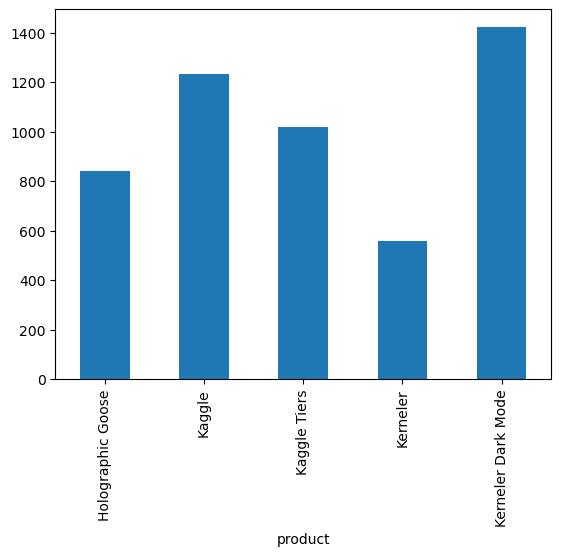

In [50]:
# Find the average sales by category
sticker_sales.groupby('country')['num_sold'].mean().plot(kind = 'bar')
sticker_sales.groupby('store')['num_sold'].mean().plot(kind = 'bar')
sticker_sales.groupby('product')['num_sold'].mean().plot(kind = 'bar')

In [51]:
# Replace missing values
sticker_sales.isna().sum()
sticker_sales['num_sold'].fillna(sticker_sales['num_sold'].mean(), inplace = True)

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

/var/folders/w5/jf80gl6n4n93r9zzwvmjj1w40000gn/T/ipykernel_26090/4219313195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sticker_sales['num_sold'].fillna(sticker_sales['num_sold'].mean(), inplace = True)


In [52]:
# Generate dummy variables
sticker_sales_dummy = pd.get_dummies(sticker_sales, 
                                     columns = ['country', 'store', 'product'], 
                                     drop_first = True,
                                     dtype = int)

In [53]:
# Fit the linear regression model
import statsmodels.api as sm
y_sales = sticker_sales['num_sold']
X_sales = sticker_sales_dummy[['country_Kenya',
       'country_Finland', 'country_Italy', 'country_Norway',
       'country_Singapore']]
X_sales_c = sm.add_constant(X_sales)
# Fit the linear regression model
model_sales = sm.OLS(y_sales, X_sales_c)
results_sales = model_sales.fit()
results_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 2.339e+04
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:18:14   Log-Likelihood:            -1.7791e+06
No. Observations:              230130   AIC:                         3.558e+06
Df Residuals:                  230124   BIC:                         3.558e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               830.3566      2.814    295.115      0.000     824.842     835.871
country_Kenya      -721.6464      3.979   -181.358      0.000    -729.445    -713.847
country_Finland     -82.1133      3.979    -20.636      0.000     -89.912     -74.314
country_Italy      -288.1152      3.979    -72.407      0.000    -295.914    -280.316
country_Norway      592.2039      3.979    148.827      0.000     584.405     600.003
country_Singapore    32.6958      3.979      8.217      0.000      24.897      40.495
==============================================================================
Omnibus:                    34168.677   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71233.556
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       5.041   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""